# Clustering

## 1. K-means y DBSCAN

En esta primera parte, vamos a trabajar con los métodos K-means y DBSCAN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en Scikit-learn. Notemos que estos datos vienen con una etiqueta asociada donde nos indica a qué cluster pertenecen. La idea será utilizar los métodos de clustering estudiados para poder identificar los clusters sin conocer esta etiqueta.

In [2]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

Grafiquemos los datasets para ver las diferencias entre cada uno.

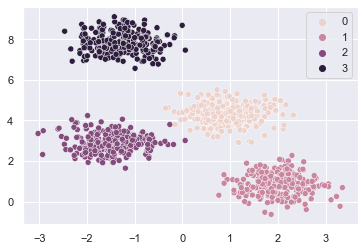

In [3]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

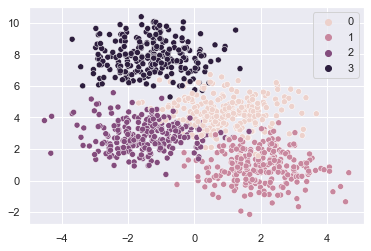

In [4]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

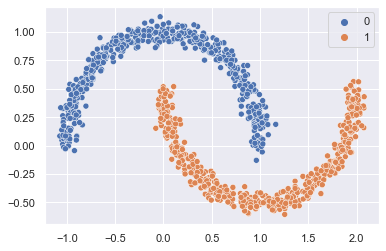

In [5]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

### 1.1 K-means

Scikit-Learn tiene una implementación de K-means.

1. Lee la documentación.

2. Define los 3 modelos para los distintos datasets.

In [6]:
from sklearn.cluster import KMeans

# Especificamos el numero adecuado de clusters en cada caso
kmeans_1 = KMeans(n_clusters=4, random_state=0)
kmeans_2 = KMeans(n_clusters=4, random_state=0)
kmeans_3 = KMeans(n_clusters=2, random_state=0)

3. Entrena los modelos con los datos, recuerda que NO hay que pasarles las etiquetas, solo los atributos.

In [7]:
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

KMeans(n_clusters=2, random_state=0)

Luego de entrenar los modelos, podemos consultar las etiquetas que se le asignó a cada instancia y el lugar de los centroides.

In [8]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(1000,)


In [9]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[ 2.01942692  0.87474842]
 [ 0.92917513  4.29023124]
 [-1.27283855  7.84651464]
 [-1.49807428  2.90164881]]


In [10]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_

4.  Ploteamos los resultados para todos los datasets. ¿Les parece que la separación fue adecuada?

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


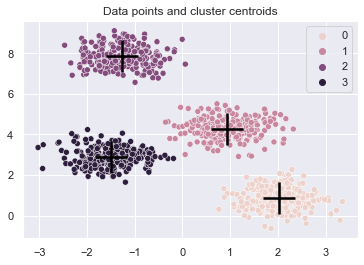

In [11]:
sns.scatterplot(X1[:, 0], X1[:, -1], hue = etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


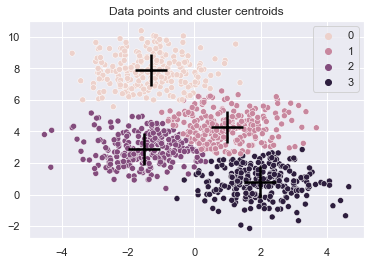

In [12]:
sns.scatterplot(X2[:, 0], X2[:, -1], hue = etiquetas_2)
sns.scatterplot(centros_2[:, 0], centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


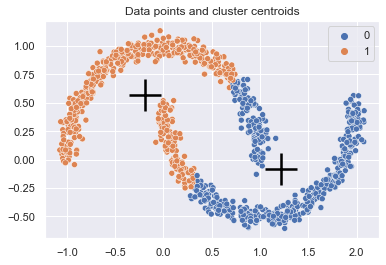

In [13]:
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_3)
sns.scatterplot(centros_3[:, 0], centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

Para ver el acuerdo que hubo entre los clusters determinados por el algoritmos de clustering y los generados originalmente, podemos usar una matriz de confusión. Notemos que no sabemos si los nombres de los clusters se corresponden entre sí, el cluster 0 en los datos originales podría ser el cluster 1 en los calculados con k-means.

<AxesSubplot:>

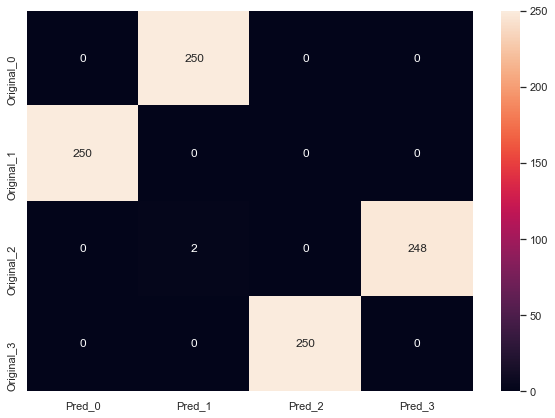

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1, etiquetas_1)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

5. Repite el ploteo de la matriz de confusión para los otros datasets. ¿Se te ocurre alguna manera de cuantificar el acuerdo entre ambos sets de etiquetas (el original y el obtenido por clustering)?

<AxesSubplot:>

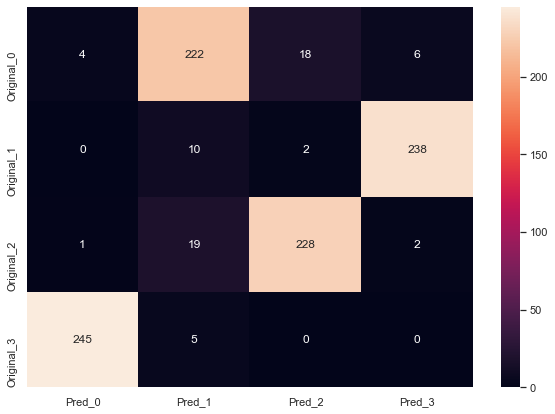

In [15]:
cm = confusion_matrix(y2,etiquetas_2)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

<AxesSubplot:>

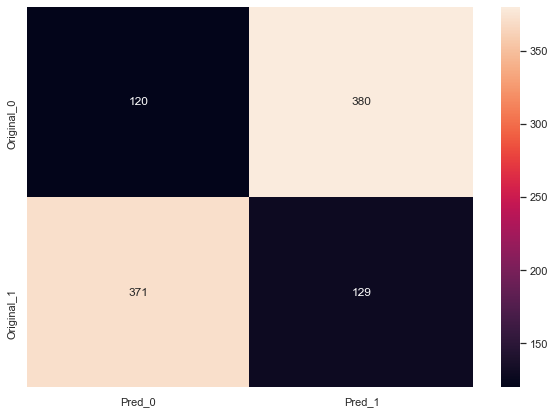

In [16]:
cm = confusion_matrix(y3,etiquetas_3)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1']],
                  columns = [i for i in ['Pred_0','Pred_1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

6. Prueba qué sucede si no elige correctamente el número de clusters. ¿Se le ocurre cómo puede usar las matrices de confusión para darse cuenta que no eligió correctamente ese número?

### 1.2 DBSCAN

1. Lee la documentación.
2. Define los 3 modelos para los distintos datasets.

In [43]:
from sklearn.cluster import DBSCAN

# En este paso tenemos que definir el epsilon y en min_samples, los parametros del método.
db_1 = DBSCAN(eps=0.3, min_samples=10)
db_2 = DBSCAN(eps=0.3, min_samples=15)
db_3 = DBSCAN(eps=0.1, min_samples=10)

3. Entrena los modelos con los distintos datasets

In [44]:
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.1, min_samples=10)

Podemos consultar las etiquetas asignadas luego de entrenar en la variable `labels_`. Notemos que cuando el label sea igual a '-1' quiere decir que esa instancia fue considerada ruido. 

4. Teniendo en cuenta esto, podemos obtener el numero de clusters y el numero de instancias consideradas ruido de la siguiente forma (solo lo hacemos para el primer dataset):

In [45]:
# Consultamos las etiquetas
labels_1 = db_1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [46]:
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)

Estimated number of clusters: 4
Estimated number of noise points: 64


Les damos ya definida una función que plotea los resultados de manera tal que colorea con distintos colores los distintos clusters, en gris los datos que se consideran Noise y ademas en tamaño mas grande las instancias que son CORES. No hace falta que cambien nada de esta función.

In [47]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

5. Ploteamos el resultado para el primer caso. ¿Te parece adecuado el resultado? Prueba qué pasa si modifica los parámetros de epsilon y min_dist.

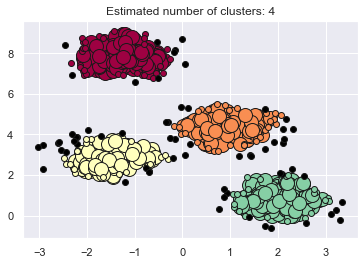

In [48]:
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

6. Repetimos el paso 5 para los otros 2 datasets, nota que debe calcular `labels_2`, `core_samples_mask_2`, etc... Recomendación: vuelva a copiar todo el codigo en las siguientes celdas en lugar de modificar el que ya tiene escrito para el dataset 1. 

In [ ]:
COMPLETAR

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

In [ ]:
COMPLETAR

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

7. Ajustar los parametros `epsilon` y `min_dist` para lograr un resultado lo más parecido al dataset original posible.

8. A partir de los resultados obtenidos, reflexione sobre las fortalezas y debilidades de cada uno de los métodos.


## 2. ¡A probar con un dataset!

Elige un dataset que te interese y aplica las técnicas vistas. ¿Qué esperas obtener?¿Qué obtienes? Por ejemplo, puedes aplicarlo sobre el dataset Iris (¿qué ocurre si usas `n_clusters=2` y `n_clusters=3` en k-means?), o el dataset del proyecto.